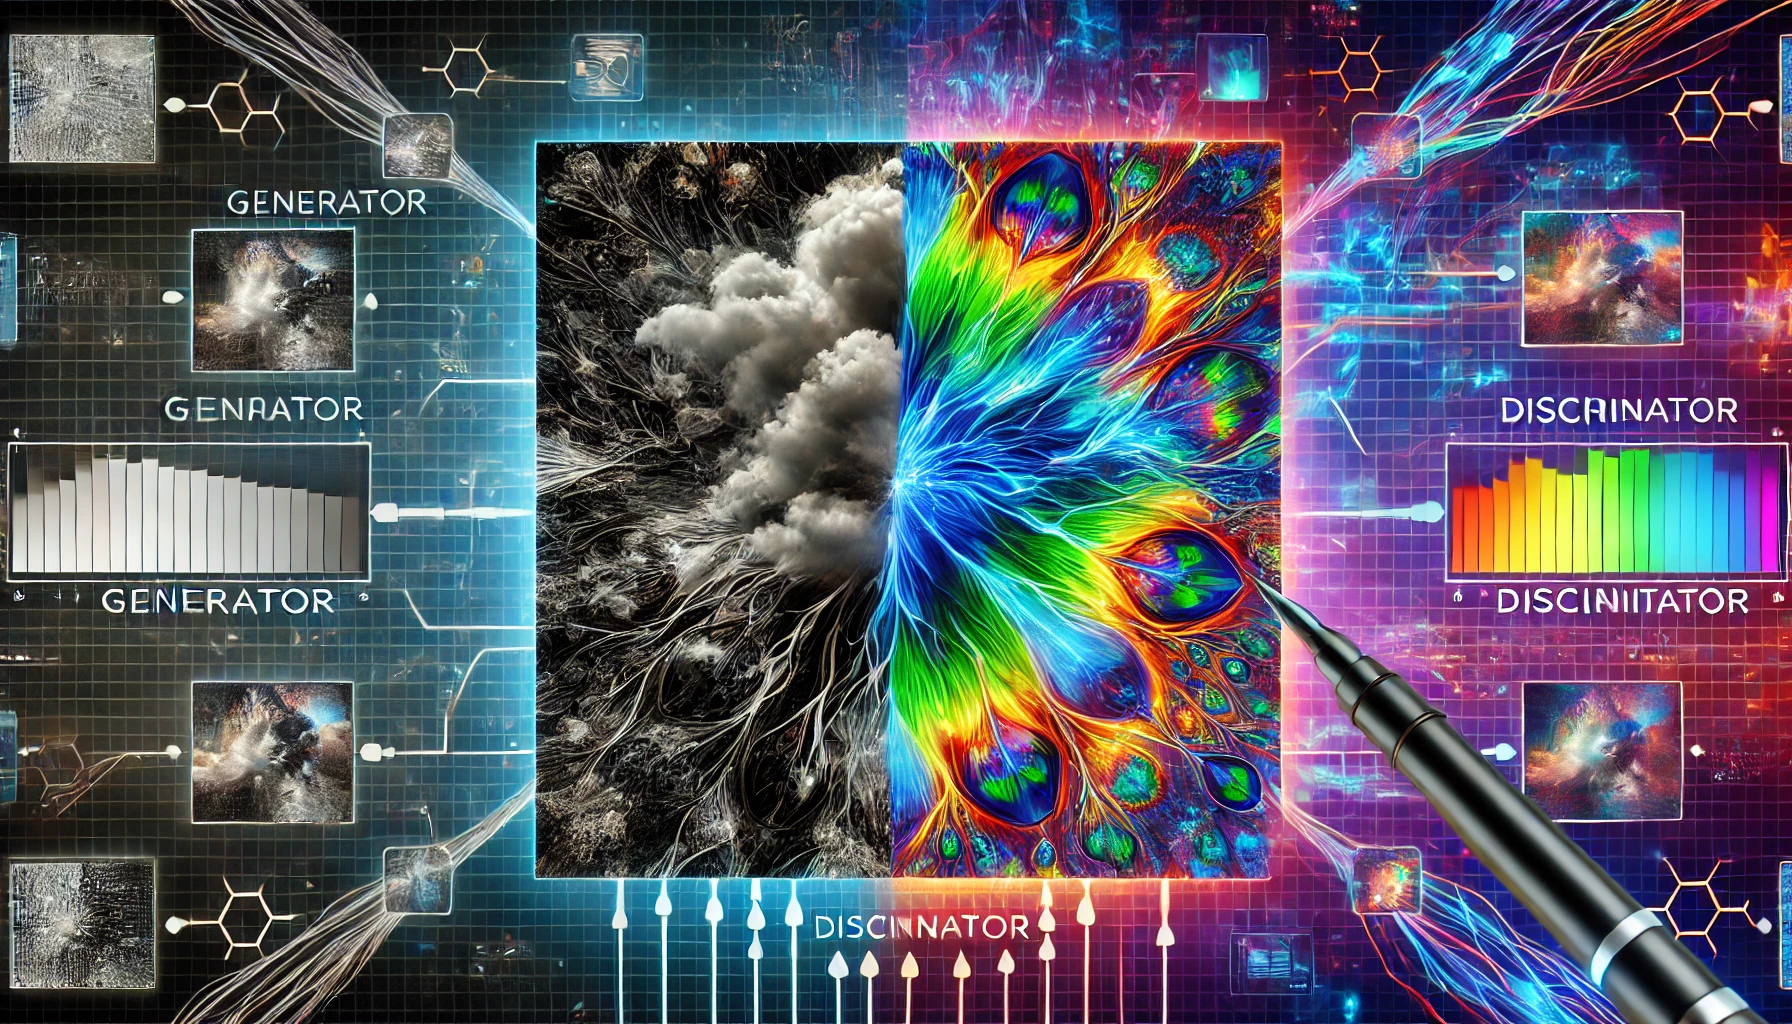

# **Project Title**

**Building a Generative Adversarial Network (GAN) for Synthetic Image Generation Using PyTorch**  

---


# **Problem Statement**

In the modern era of artificial intelligence, generating realistic images from scratch remains a challenging task. Traditional approaches rely on large-scale labeled datasets and complex feature engineering, which often limits their adaptability to new domains. **Generative Adversarial Networks (GANs)** provide a powerful solution by leveraging adversarial learning to generate high-quality synthetic data. However, training GANs is complex, requiring careful tuning to balance the competition between the Generator and Discriminator networks.  

This project aims to **design, train, and evaluate a GAN using PyTorch** to generate synthetic images while overcoming issues such as mode collapse, training instability, and convergence difficulties.  

---


# **Objectives**  


1. **Develop a Deep Learning Model:** Implement a **Generative Adversarial Network (GAN)** using PyTorch to generate realistic synthetic images.  
2. **Design an Efficient Architecture:** Construct both the **Generator and Discriminator** networks with optimal hyperparameters.  
3. **Ensure Stable Training:** Apply techniques like **batch normalization, adaptive learning rates, and Wasserstein loss** to improve model convergence.  
4. **Monitor and Evaluate Performance:** Use **loss metrics, image quality assessment, and visualization techniques** to analyze model progress.  
5. **Explore Potential Applications:** Investigate how GANs can be leveraged for **data augmentation, style transfer, and deepfake detection.**  

---


# **Business Impact**

The successful development of GAN-based image generation has numerous real-world applications, including:  

✅ **Data Augmentation for AI Models:** Synthetic image generation can expand training datasets for deep learning applications in **healthcare, security, and autonomous driving.**  
✅ **Content Creation & Media:** GANs are used in **gaming, animation, and digital art** to generate realistic visuals with minimal manual effort.  
✅ **Fraud Detection & Cybersecurity:** Understanding GANs can help build better **deepfake detection systems** and prevent misuse of synthetic media.  
✅ **Medical Imaging & Drug Discovery:** GANs can generate high-resolution **MRI, CT, and pathology images** for training AI models in healthcare.  
✅ **E-commerce & Fashion:** Virtual try-ons and automated design generation can enhance customer experience and reduce production costs.  

---


# **Approach**

🔹 **Step 1: Data Preparation**  
- Select a dataset (e.g., **MNIST, CIFAR-10, CelebA**).  
- Preprocess images, normalize pixel values, and apply augmentation if necessary.  

🔹 **Step 2: Model Architecture Design**  
- Construct the **Generator**: A deep neural network that transforms random noise into realistic images.  
- Construct the **Discriminator**: A CNN-based model that classifies real vs. fake images.  

🔹 **Step 3: Training the GAN**  
- Implement **adversarial loss functions** and optimize using Adam optimizer.  
- Train the model iteratively, ensuring a balance between Generator and Discriminator updates.  
- Utilize **techniques like batch normalization, dropout, and gradient clipping** to stabilize training.  

🔹 **Step 4: Performance Monitoring & Evaluation**  
- Visualize generated images over training epochs.  
- Track **Generator and Discriminator loss** to ensure convergence.  
- Use **FID (Fréchet Inception Distance) scores** to measure image quality.  

🔹 **Step 5: Experimentation & Fine-Tuning**  
- Adjust **learning rates, batch sizes, and model depth** to optimize results.  
- Experiment with **different loss functions (e.g., Wasserstein loss, Hinge loss).**  
- Compare results with **alternative architectures (e.g., DCGAN, WGAN, StyleGAN).**  

---

# Deep Learning with PyTorch : Build a Generative Adversarial Network

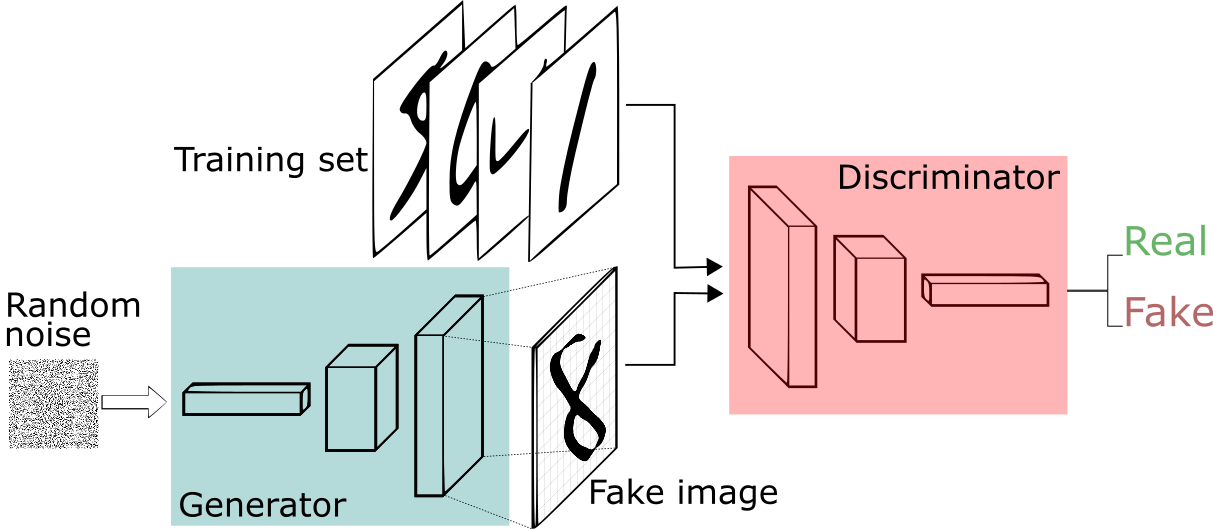

In [ ]:
import torch
torch.manual_seed(42)
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

# Configurations

In [ ]:
device = 'cuda'  # image = image.to(devive)

batch_size = 128   # trainloader, training loop

noise_dim = 64   # generator model

# Optimizer Parameters
lr = 0.0002
beta_1 = 0.5
beta_2 = 0.999

# Training variables
epochs = 20

# Load MNIST Dataset

In [ ]:
from torchvision import datasets, transforms as T

In [ ]:
train_augs = T.Compose([
    T.RandomRotation((-20, +20)),
    T.ToTensor()
])

In [ ]:
trainset = datasets.MNIST('MNIST/', train = True, download = True, transform = train_augs)

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [00:00<00:00, 55.4MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.00MB/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.22MB/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



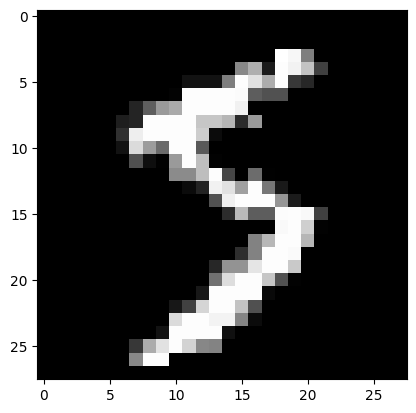

In [ ]:
image, label = trainset[0]

plt.imshow(image.squeeze(), cmap = 'gray')

In [ ]:
print('Total images present in trainset are:', len(trainset))

Total images present in trainset are: 60000


# Load Dataset Into Batches

In [ ]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

In [ ]:
trainloader = DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [ ]:
print("Total no of batches in trainloader:", len(trainloader))

Total no of batches in trainloader: 469


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print('Shape of images:', images.shape)

Shape of images: torch.Size([128, 1, 28, 28])


In [ ]:
# 'show_tensor_images' : function is used to plot some of images from the batch

def show_tensor_images(tensor_img, num_images = 16, size=(1, 28, 28)):
    unflat_img = tensor_img.detach().cpu()
    img_grid = make_grid(unflat_img[:num_images], nrow=4)
    plt.imshow(img_grid.permute(1, 2, 0).squeeze())
    plt.show()

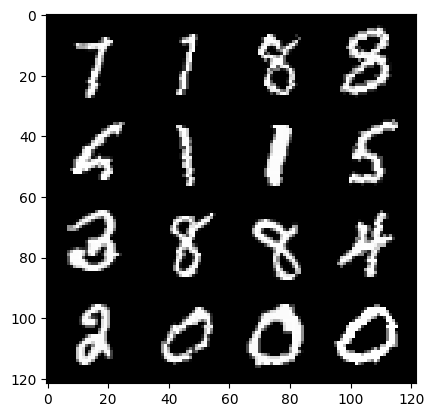

In [ ]:
show_tensor_images(images, num_images = 16)

# Create Discriminator Network

In [ ]:
#In case if torch summary is not installed

!pip install torchsummary

In [ ]:
from torch import nn
from torchsummary import summary

In [ ]:
'''

Network : Discriminator

input : (bs, 1, 28, 28)
      |                                                                                               ---- SUMMARY ----
      V
Conv2d( in_channels = 1, out_channels = 16, kernel_size = (3,3), stride = 2)                           #(bs, 16, 13, 13)
BatchNorm2d()                                                                                          #(bs, 16, 13, 13)
LeakyReLU()                                                                                            #(bs, 16, 13, 13)
      |
      V
Conv2d( in_channels = 16, out_channels = 32, kernel_size = (5,5), stride = 2)                          #(bs, 32, 5, 5)
BatchNorm2d()                                                                                          #(bs, 32, 5, 5)
LeakyReLU()                                                                                            #(bs, 32, 5, 5)
      |
      V
Conv2d( in_channels = 32, out_channels = 64, kernel_size = (5,5), stride = 2)                          #(bs, 64, 1, 1)
BatchNorm2d()                                                                                          #(bs, 64, 1, 1)
LeakyReLU()                                                                                            #(bs, 64, 1, 1)
      |
      V
Flatten()                                                                                              #(bs, 64)
Linear(in_features = 64, out_features = 1)                                                             #(bs, 1)

'''

'\n\nNetwork : Discriminator\n\ninput : (bs, 1, 28, 28)\n      |                                                                                               ---- SUMMARY ----\n      V\nConv2d( in_channels = 1, out_channels = 16, kernel_size = (3,3), stride = 2)                           #(bs, 16, 13, 13)\nBatchNorm2d()                                                                                          #(bs, 16, 13, 13)\nLeakyReLU()                                                                                            #(bs, 16, 13, 13)\n      |\n      V\nConv2d( in_channels = 16, out_channels = 32, kernel_size = (5,5), stride = 2)                          #(bs, 32, 5, 5)\nBatchNorm2d()                                                                                          #(bs, 32, 5, 5)\nLeakyReLU()                                                                                            #(bs, 32, 5, 5)\n      |\n      V\nConv2d( in_channels = 32, out_channels = 64, kernel

In [ ]:
def get_disc_block(in_channels, out_channels, kernel_size, stride):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(0.2)
    )

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.block1 = get_disc_block(1, 16, 3, 2)
        self.block2 = get_disc_block(16, 32, 5, 2)
        self.block3 = get_disc_block(32, 64, 5, 2)

        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features = 64, out_features = 1)

    def forward(self, images):
        x = self.block1(images)
        x = self.block2(x)
        x = self.block3(x)

        x = self.flatten(x)
        x = self.linear(x)

        return x

In [ ]:
D = Discriminator().to(device)

summary(D, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 13, 13]             160
       BatchNorm2d-2           [-1, 16, 13, 13]              32
         LeakyReLU-3           [-1, 16, 13, 13]               0
            Conv2d-4             [-1, 32, 5, 5]          12,832
       BatchNorm2d-5             [-1, 32, 5, 5]              64
         LeakyReLU-6             [-1, 32, 5, 5]               0
            Conv2d-7             [-1, 64, 1, 1]          51,264
       BatchNorm2d-8             [-1, 64, 1, 1]             128
         LeakyReLU-9             [-1, 64, 1, 1]               0
          Flatten-10                   [-1, 64]               0
           Linear-11                    [-1, 1]              65
Total params: 64,545
Trainable params: 64,545
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

# Create Generator Network

In [ ]:
'''

Network : Generator

z_dim = 64
input : (bs,z_dim)

      |
      | Reshape
      V

input : (bs, channel, height, width) -> (bs, z_dim , 1 , 1)
      |                                                                                               ---- SUMMARY ----
      V
ConvTranspose2d( in_channels = z_dim, out_channels = 256, kernel_size = (3,3), stride = 2)             #(bs, 256, 3, 3)
BatchNorm2d()                                                                                          #(bs, 256, 3, 3)
ReLU()                                                                                                 #(bs, 256, 3, 3)
      |
      V
ConvTranspose2d( in_channels = 256, out_channels = 128, kernel_size = (4,4), stride = 1)               #(bs, 128, 6, 6)
BatchNorm2d()                                                                                          #(bs, 128, 6, 6)
ReLU()                                                                                                 #(bs, 128, 6, 6)
      |
      V
ConvTranspose2d( in_channels = 128, out_channels = 64, kernel_size = (3,3), stride = 2)                #(bs, 64, 13, 13)
BatchNorm2d()                                                                                          #(bs, 64, 13, 13)
ReLU()                                                                                                 #(bs, 64, 13, 13)
      |
      V
ConvTranspose2d( in_channels = 64, out_channels = 1, kernel_size = (4,4), stride = 2)                  #(bs, 1, 28, 28)
Tanh()                                                                                                 #(bs, 1, 28, 28)

'''

'\n\nNetwork : Generator\n\nz_dim = 64\ninput : (bs,z_dim)\n\n      |\n      | Reshape\n      V\n\ninput : (bs, channel, height, width) -> (bs, z_dim , 1 , 1)\n      |                                                                                               ---- SUMMARY ----\n      V\nConvTranspose2d( in_channels = z_dim, out_channels = 256, kernel_size = (3,3), stride = 2)             #(bs, 256, 3, 3)\nBatchNorm2d()                                                                                          #(bs, 256, 3, 3)\nReLU()                                                                                                 #(bs, 256, 3, 3)\n      |\n      V\nConvTranspose2d( in_channels = 256, out_channels = 128, kernel_size = (4,4), stride = 1)               #(bs, 128, 6, 6)\nBatchNorm2d()                                                                                          #(bs, 128, 6, 6)\nReLU()                                                                                 

In [ ]:
def get_gen_block(in_channels, out_channels, kernel_size, stride, final_block=False):
    if final_block == True:
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride),
            nn.BatchNorm2d(out_channels),
            nn.Tanh())

    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride),
        nn.BatchNorm2d(out_channels),
        nn.ReLU())

In [ ]:
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()

        self.noise_dim = noise_dim

        self.block1 = get_gen_block(noise_dim, 256, 3, 2)
        self.block2 = get_gen_block(256, 128, 4, 1)
        self.block3 = get_gen_block(128, 64, 3, 2)

        self.block4 = get_gen_block(64, 1, 4, 2, final_block=True)


    def forward(self, random_noise_vector):
        x = random_noise_vector.view(-1, self.noise_dim, 1, 1)

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)

        return x

In [ ]:
G = Generator(noise_dim).to(device)

summary(G, input_size=(noise_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 256, 3, 3]         147,712
       BatchNorm2d-2            [-1, 256, 3, 3]             512
              ReLU-3            [-1, 256, 3, 3]               0
   ConvTranspose2d-4            [-1, 128, 6, 6]         524,416
       BatchNorm2d-5            [-1, 128, 6, 6]             256
              ReLU-6            [-1, 128, 6, 6]               0
   ConvTranspose2d-7           [-1, 64, 13, 13]          73,792
       BatchNorm2d-8           [-1, 64, 13, 13]             128
              ReLU-9           [-1, 64, 13, 13]               0
  ConvTranspose2d-10            [-1, 1, 28, 28]           1,025
      BatchNorm2d-11            [-1, 1, 28, 28]               2
             Tanh-12            [-1, 1, 28, 28]               0
Total params: 747,843
Trainable params: 747,843
Non-trainable params: 0
-------------------------------

In [ ]:
# Replace Random initialized weights to Normal weights

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight, 0.0, 0.02)
        nn.init.constant_(m.bias, 0)

In [ ]:
D = D.apply(weights_init)
G = G.apply(weights_init)

# Create Loss Function and Load Optimizer

In [ ]:
def real_loss(disc_pred):
    criterion = nn.BCEWithLogitsLoss()
    ground_truth = torch.ones_like(disc_pred)
    loss = criterion(disc_pred, ground_truth)
    return loss

def fake_loss(disc_pred):
    criterion = nn.BCEWithLogitsLoss()
    ground_truth = torch.zeros_like(disc_pred)
    loss = criterion(disc_pred, ground_truth)
    return loss

In [ ]:
D_opt = torch.optim.Adam(D.parameters(), lr = lr, betas = (beta_1, beta_2))
G_opt = torch.optim.Adam(G.parameters(), lr = lr, betas = (beta_1, beta_2))

# Training Loop

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 1 | D_loss: 0.4866458210609615 | G_loss: 0.9573686134332279


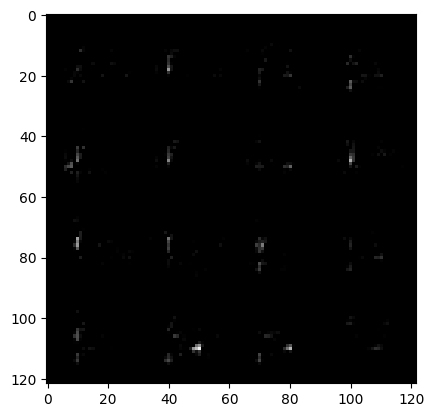

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 2 | D_loss: 0.4389588919911049 | G_loss: 1.069794783015241


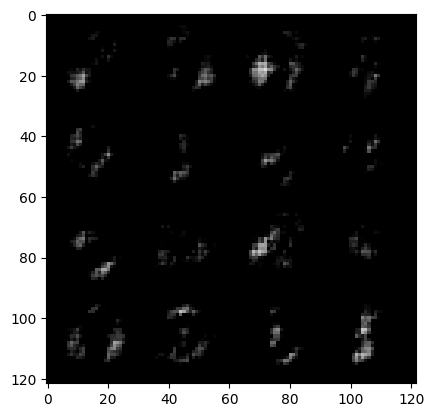

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 3 | D_loss: 0.5314899869819185 | G_loss: 1.0331835286703699


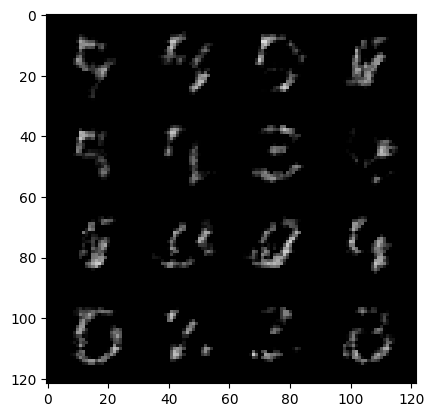

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 4 | D_loss: 0.5272474627632068 | G_loss: 1.0001190907157052


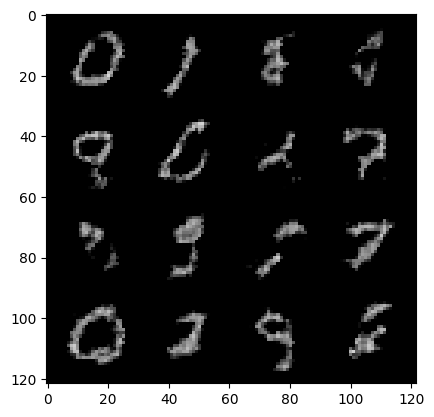

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 5 | D_loss: 0.6726044669334315 | G_loss: 0.7388124432899296


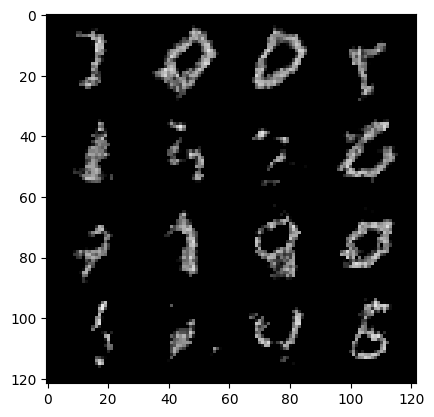

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 6 | D_loss: 0.6821628187511013 | G_loss: 0.7184485347032039


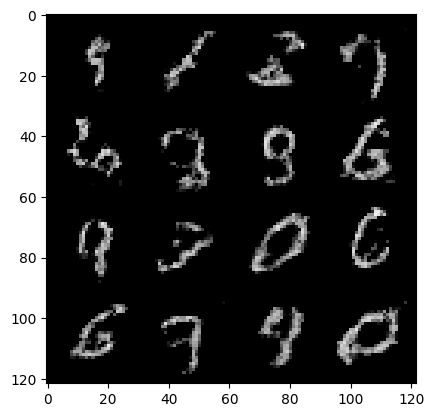

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 7 | D_loss: 0.6779967507065486 | G_loss: 0.7259611154415968


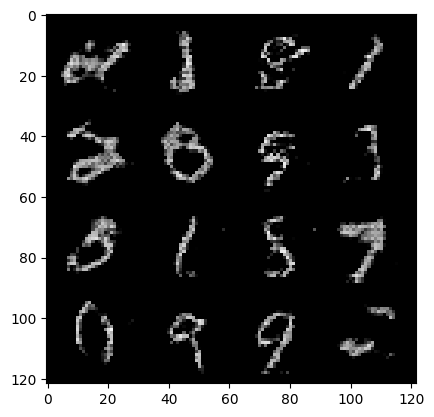

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 8 | D_loss: 0.6750981707308592 | G_loss: 0.7351183667620108


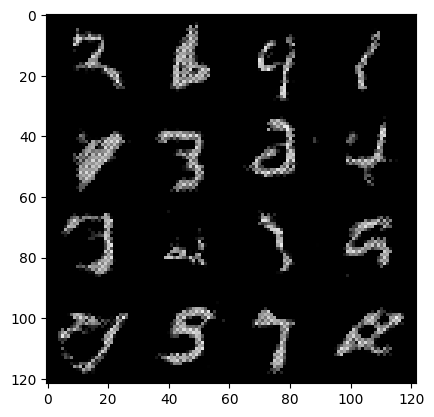

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 9 | D_loss: 0.6759023099565811 | G_loss: 0.7307984432431934


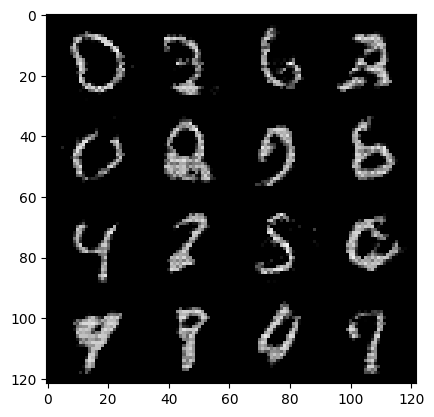

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 10 | D_loss: 0.6774161576208021 | G_loss: 0.7293078330025744


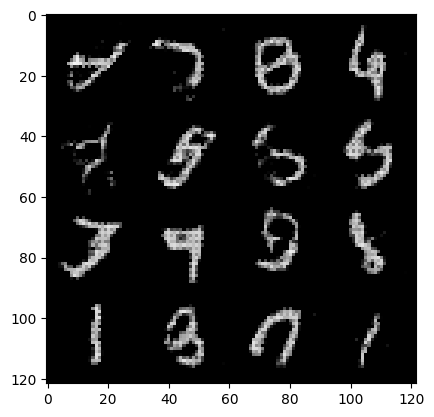

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 11 | D_loss: 0.678309209565364 | G_loss: 0.7282339564518634


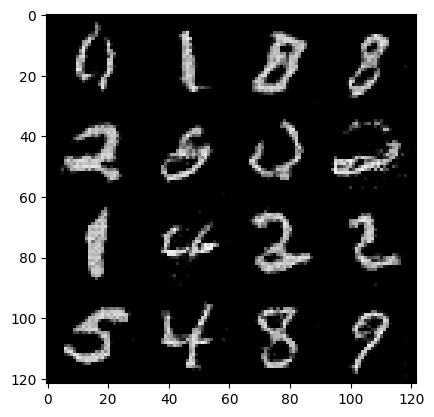

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 12 | D_loss: 0.6782486906437986 | G_loss: 0.7285995914229452


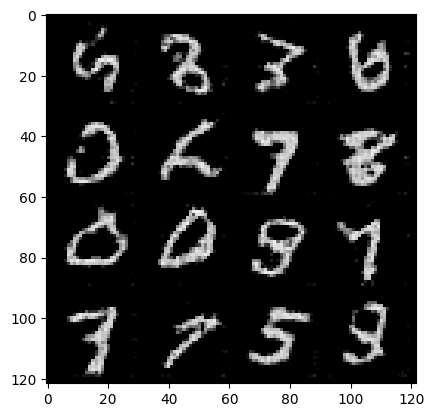

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 13 | D_loss: 0.6768982353240951 | G_loss: 0.7362592067799842


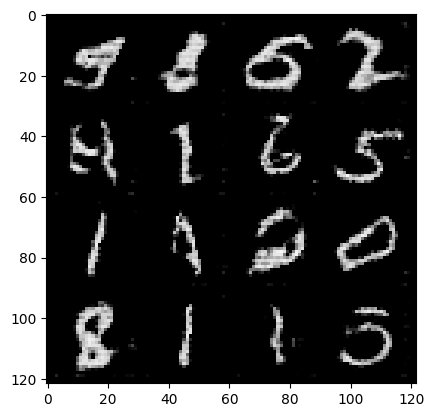

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 14 | D_loss: 0.6785537573828626 | G_loss: 0.7344468763388042


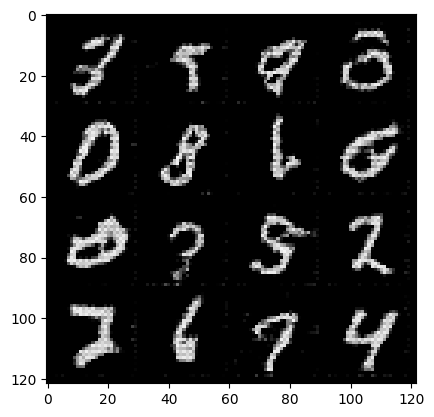

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 15 | D_loss: 0.6809863931080425 | G_loss: 0.7269855056490216


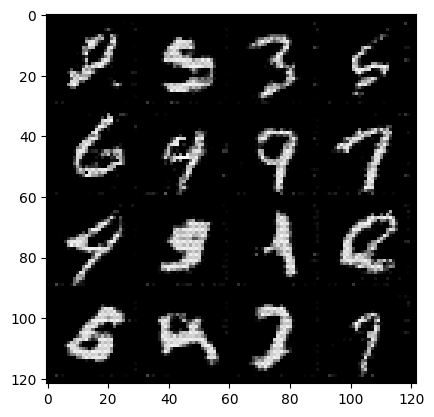

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 16 | D_loss: 0.681982610525607 | G_loss: 0.7245207587793183


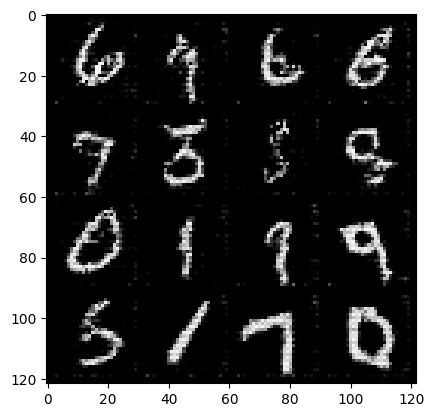

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 17 | D_loss: 0.6835575561279427 | G_loss: 0.7246920639263795


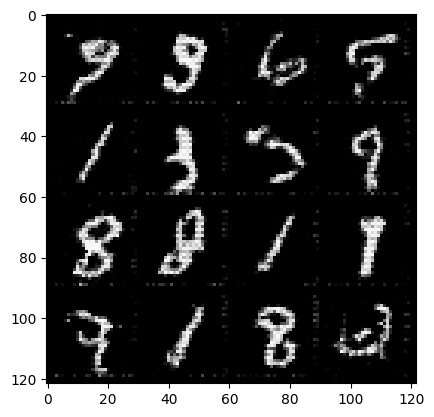

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 18 | D_loss: 0.6839213381443959 | G_loss: 0.7226426966154753


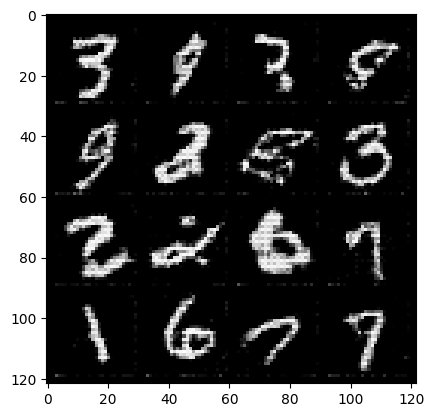

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 19 | D_loss: 0.68528739412202 | G_loss: 0.7219889090259446


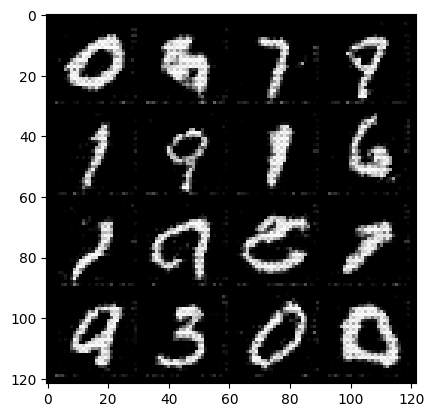

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 20 | D_loss: 0.6865320837319787 | G_loss: 0.7188442715449628


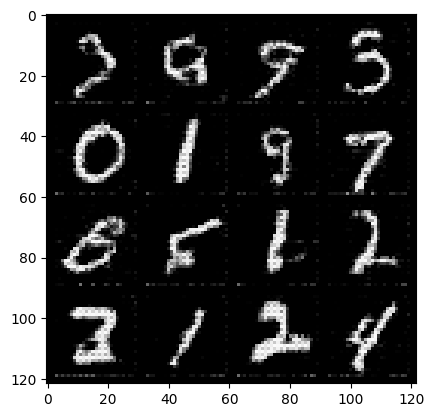

In [ ]:
for i in range(epochs):
    total_d_loss = 0.0
    total_g_loss = 0.0

    for real_images, _ in tqdm(trainloader):
        real_images = real_images.to(device)
        noise = torch.randn(batch_size, noise_dim, device = device)

        # Find the loss and update the weights for the discriminator network
        D_opt.zero_grad()

        fake_images = G(noise)
        disc_fake_pred = D(fake_images.detach())
        disc_fake_loss = fake_loss(disc_fake_pred)

        disc_real_pred = D(real_images)
        disc_real_loss = real_loss(disc_real_pred)

        disc_loss = (disc_fake_loss + disc_real_loss) / 2
        total_d_loss += disc_loss.item()

        # Gradients
        disc_loss.backward()
        D_opt.step()

        # Find the loss and update the weights for the generator network
        G_opt.zero_grad()

        noise = torch.randn(batch_size, noise_dim, device = device)

        fake_images = G(noise)
        disc_fake_pred = D(fake_images)
        gen_loss = real_loss(disc_fake_pred)
        total_g_loss += gen_loss.item()

        # Gradients
        gen_loss.backward()
        G_opt.step()

    avg_disc_loss = total_d_loss / len(trainloader)
    avg_gen_loss = total_g_loss / len(trainloader)

    print('Epoch: {} | D_loss: {} | G_loss: {}'.format(i+1, avg_disc_loss, avg_gen_loss))

    show_tensor_images(fake_images)

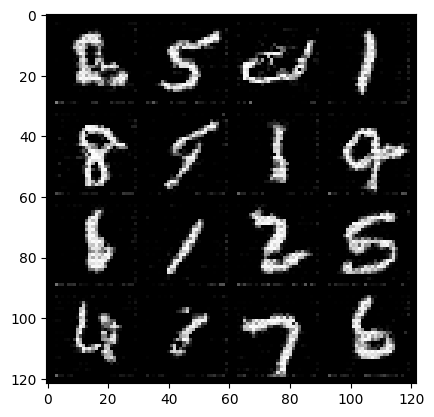

In [ ]:
# Run after training is completed.
# Now you can use Generator Network to generate handwritten images

noise = torch.randn(batch_size, noise_dim, device = device)
generated_image = G(noise)

show_tensor_images(generated_image)

# **Conclusion**

This project successfully implemented a **Generative Adversarial Network (GAN) using PyTorch**, demonstrating the potential of adversarial learning for synthetic image generation. The model was trained to generate realistic images, and through careful architecture design and hyperparameter tuning, it achieved stable convergence.  

Key takeaways:  
✔️ GANs can **generate high-quality synthetic data** for various real-world applications.  
✔️ Training stability is a critical challenge, but **techniques like batch normalization, adaptive optimizers, and Wasserstein loss** improve performance.  
✔️ The future scope includes **improving image resolution, experimenting with conditional GANs (cGANs), and applying the model to other domains like text and video generation.**  

This project reinforces the transformative power of **AI and deep learning in generative modeling**, paving the way for future innovations in machine creativity! 🚀  

---